In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

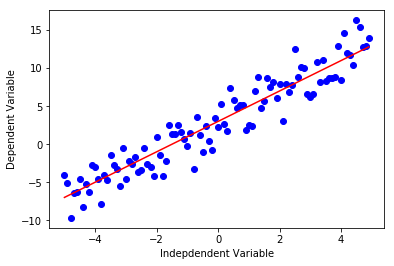

In [4]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 2*(x) + 3
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
#plt.figure(figsize=(8,6))
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

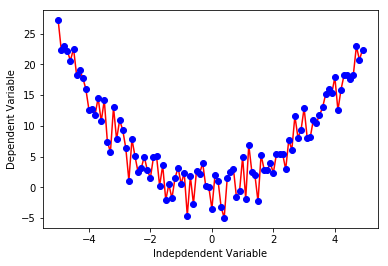

In [21]:
x1= np.arange(-5.0,5.0,0.1)

y1= np.power(x1,2)

y_noise1 = 2 * np.random.normal(size=x1.size)
y2 = y1 + y_noise1
plt.plot(x1,y2,'r')
plt.plot(x1,y2,'bo')

plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

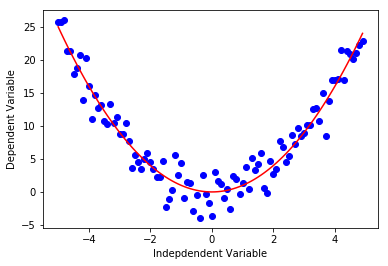

In [18]:
x = np.arange(-5.0, 5.0, 0.1)

##You can  adjust the slope and intercept to verify the changes in the graph

y = np.power(x,2)
y_noise = 2 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

In [22]:
df= pd.read_csv('china_gdp.csv')

In [24]:
df.describe()

,Year,Value
count,55.00000,5.500000e+01
mean,1987.00000,1.437042e+12
std,16.02082,2.500085e+12
min,1960.00000,4.668518e+10
25%,1973.50000,1.395123e+11
50%,1987.00000,3.074796e+11
75%,2000.50000,1.268748e+12
max,2014.00000,1.035483e+13


# Plotting the data

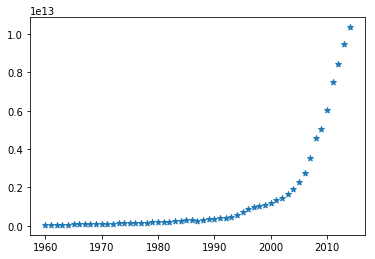

In [29]:
plt.scatter(x=df['Year'], y= df['Value'],marker='*')
plt.show()

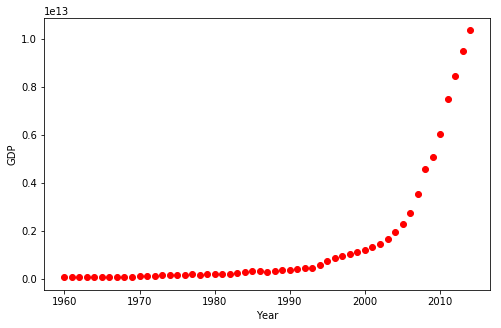

In [30]:
plt.figure(figsize=(8,5))
x_data, y_data = (df["Year"].values, df["Value"].values)
plt.plot(x_data, y_data, 'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

# Choosing a model

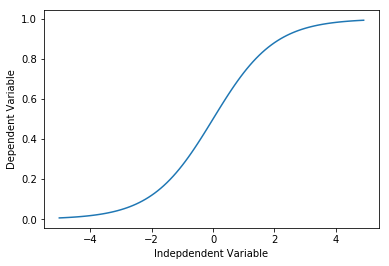

In [31]:
X = np.arange(-5.0, 5.0, 0.1)
Y = 1.0 / (1.0 + np.exp(-X))

plt.plot(X,Y) 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

# Building a model

In [32]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

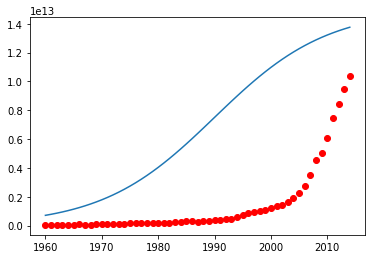

In [33]:
beta_1 = 0.10
beta_2 = 1990.0

#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

In [34]:
# Lets normalize our data
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

In [35]:
#finding best parameters for our fit line using curve_fit
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.451710, beta_2 = 0.997207


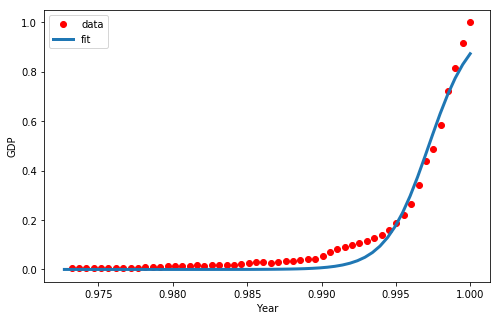

In [36]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [47]:
acu = (np.mean(np.power((y-ydata),2)))

In [37]:
np.mean(y)

0.11552766823745148

In [38]:
np.mean(ydata)

0.1387798327920327

In [39]:
np.mean((ydata-y))

0.023252164554581248

In [41]:
np.power(x,2)

array([0.94615446, 0.94713806, 0.94812217, 0.94910679, 0.95009192,
       0.95107756, 0.95206372, 0.95305038, 0.95403756, 0.95502524,
       0.95601344, 0.95700215, 0.95799137, 0.9589811 , 0.95997134,
       0.96096209, 0.96195335, 0.96294513, 0.96393741, 0.96493021,
       0.96592352, 0.96691733, 0.96791166, 0.9689065 , 0.96990185,
       0.97089772, 0.97189409, 0.97289097, 0.97388837, 0.97488627,
       0.97588469, 0.97688362, 0.97788306, 0.97888301, 0.97988347,
       0.98088444, 0.98188592, 0.98288792, 0.98389042, 0.98489344,
       0.98589697, 0.986901  , 0.98790555, 0.98891061, 0.98991618,
       0.99092227, 0.99192886, 0.99293596, 0.99394358, 0.9949517 ,
       0.99596034, 0.99696949, 0.99797915, 0.99898932, 1.        ])

In [48]:
print(acu)

0.0015679266136859312


In [46]:
msk = np.random.rand(len(df)) < 0.8
train_x = xdata[msk]
test_x = xdata[~msk]
train_y = ydata[msk]
test_y = ydata[~msk]

# build the model using train set
popt, pcov = curve_fit(sigmoid, train_x, train_y)

# predict using test set
y_hat = sigmoid(test_x, *popt)

# evaluation
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - test_y) ** 2))
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_hat , test_y) )

Mean absolute error: 0.20
Residual sum of squares (MSE): 0.12
R2-score: -153170255285415008131254059008.00


c:\users\srivatsav\appdata\local\programs\python\python36-32\lib\site-packages\scipy\optimize\minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
